## Limpieza de datos

In [47]:
import numpy as np
import pandas as pd

In [48]:
moon = pd.read_csv('data/lunardata.txt',
                   converters={'month': '{:0>2}'.format, 'day': '{:0>2}'.format})
moon.head()


,year,month,day,luna
0,1992,01,04,0
1,1992,01,05,1
2,1992,01,06,2
3,1992,01,07,3
4,1992,01,08,4


In [49]:
seizures = pd.read_csv('data/mora.csv')
seizures.head()

,id,date,int
0,1,20211204,1
1,2,20211206,2
2,3,20211207,1
3,4,20211207,1
4,5,20211209,1


In [50]:
#creo la columna date con el mismo formato que la existente en el dataframe seizures
moon['date'] = (moon['year'].astype(str) + moon['month'].astype(str) + moon['day'].astype(str)).astype(int)
moon.head()

,year,month,day,luna,date
0,1992,01,04,0,19920104
1,1992,01,05,1,19920105
2,1992,01,06,2,19920106
3,1992,01,07,3,19920107
4,1992,01,08,4,19920108


In [51]:
# uno ambos datafames en uno nuevo
conc = pd.merge(seizures, moon, on="date")
conc.head()

,id,date,int,year,month,day,luna
0,1,20211204,1,2021,12,04,1
1,2,20211206,2,2021,12,06,3
2,3,20211207,1,2021,12,07,4
3,4,20211207,1,2021,12,07,4
4,5,20211209,1,2021,12,09,6


In [52]:
#creo una columna con el tipo de luna
def moon_type(i):
    if(i < 10):
        return 'New Moon'
    elif(i>=10 and i < 20):
        return 'First Quarter'
    elif(i>=20 and i<30):
        return 'Full Moon'
    else:
        return 'Third Quarter'


conc['moon_type'] = conc['luna'].map(moon_type)

conc.head()


,id,date,int,year,month,day,luna,moon_type
0,1,20211204,1,2021,12,04,1,New Moon
1,2,20211206,2,2021,12,06,3,New Moon
2,3,20211207,1,2021,12,07,4,New Moon
3,4,20211207,1,2021,12,07,4,New Moon
4,5,20211209,1,2021,12,09,6,New Moon


## Analisis

In [80]:
count_moontype = conc.groupby('moon_type')['int'].count().reset_index()
count_moontype


,moon_type,int
0,First Quarter,7
1,Full Moon,16
2,New Moon,9
3,Third Quarter,4


In [81]:
count_month = conc.groupby('month')['int'].count().reset_index()
count_month


,month,int
0,02,3
1,03,2
2,06,4
3,07,1
4,11,1
5,12,25


In [85]:
count_year = conc.groupby('year')['int'].count().reset_index()
count_year


,year,int
0,2021,25
1,2022,8
2,2023,3


In [102]:
group_year = conc.groupby(by=['year', 'month'])['int'].count().reset_index()
group_year

,year,month,int
0,2021,12,25
1,2022,02,3
2,2022,03,2
3,2022,06,1
4,2022,07,1
5,2022,11,1
6,2023,06,3


## Visualización

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(array([ 9.,  0.,  0.,  7.,  0.,  0., 16.,  0.,  0.,  4.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

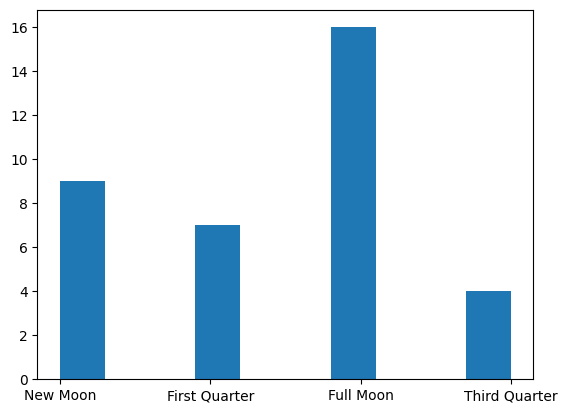

In [64]:
plt.hist(conc['moon_type'])

([<matplotlib.patches.Wedge at 0x2623de1fee0>,
 [Text(0.9010672421543008, 0.630934089359929, 'First Quarter'),
  Text(-0.9526279613277876, 0.5499999702695114, 'Full Moon'),
  Text(0.09587136262132409, -1.0958141639115324, 'New Moon'),
  Text(1.0336618994982714, -0.3762221119573192, 'Third Quarter')])

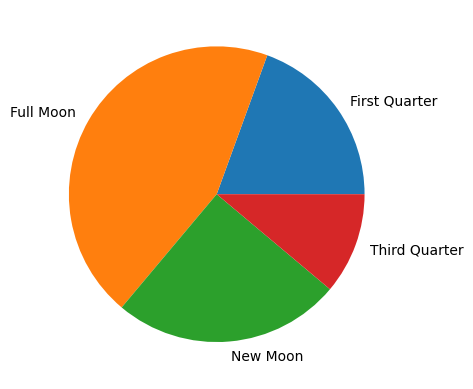

In [84]:

plt.pie(count_moontype['int'], labels=count_moontype['moon_type'])
